In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
data_cleaned = data.drop(['id', 'Unnamed: 32'], axis=1)

In [6]:
data_cleaned.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
Q1 = data_cleaned.quantile(0.25)
Q3 = data_cleaned.quantile(0.75)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers = ((data_cleaned < lower_bound) | (data_cleaned > upper_bound))

In [ ]:
#print(outliers)
outlier_values = data_cleaned[outliers]
print(outlier_values)

In [ ]:
label_encoder = LabelEncoder()
data_cleaned['diagnosis'] = label_encoder.fit_transform(data_cleaned['diagnosis'])
data_cleaned

In [ ]:
X = data_cleaned.drop('diagnosis', axis=1) #separate feature and target
y = data_cleaned['diagnosis']

In [ ]:
# here X is having all colum except target and y is having that target

In [ ]:
scaler = StandardScaler()# standardize feature col
X_scaled = scaler.fit_transform(X)
# data.csv[["X_scaled"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42) # split data

In [8]:
decision_tree = DecisionTreeClassifier(random_state=42) # train decision model
decision_tree.fit(X_train, y_train)
#random_state to a specific number, you ensure that every time you run the algorithm, you get the same result. 
#This is useful when you want to reproduce your results exactly.

NameError: name 'X_train' is not defined

In [9]:
y_pred_decision_tree = decision_tree.predict(X_test)

NameError: name 'X_test' is not defined

In [13]:
decision_tree_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_decision_tree),
    "Precision": precision_score(y_test, y_pred_decision_tree),
    "Recall": recall_score(y_test, y_pred_decision_tree),
    "F1 Score": f1_score(y_test, y_pred_decision_tree)
}

In [14]:
print("Decision Tree Metrics:", decision_tree_metrics)

Decision Tree Metrics: {'Accuracy': 0.9473684210526315, 'Precision': 0.9302325581395349, 'Recall': 0.9302325581395349, 'F1 Score': 0.9302325581395349}


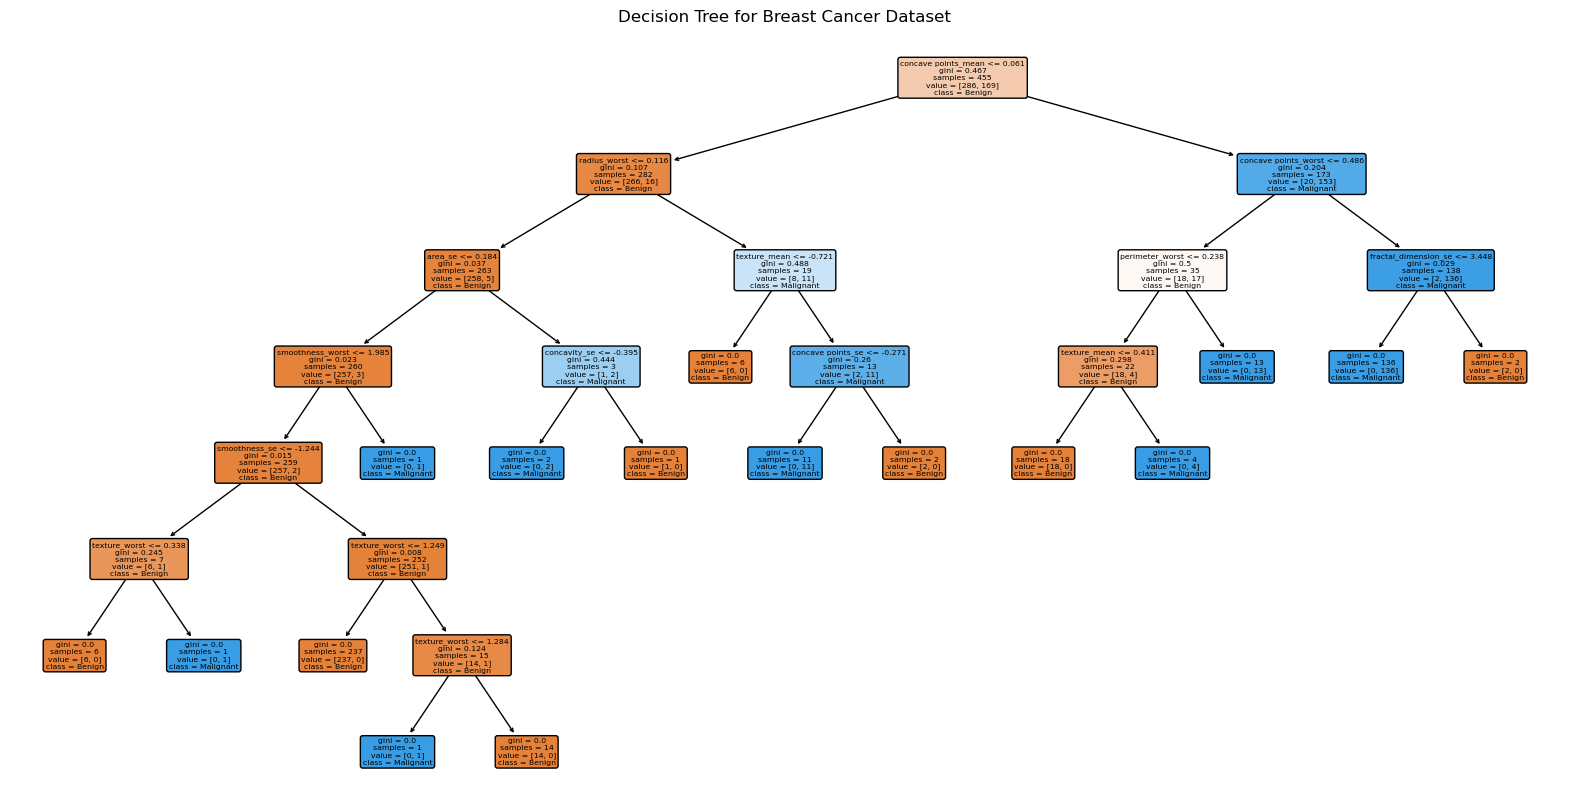

In [15]:
feature_names = list(X.columns) # convert the colum to list instead index

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=feature_names, class_names=['Benign', 'Malignant'], rounded=True)
# filled used for color and rounded used for curve edges
plt.title("Decision Tree for Breast Cancer Dataset")
#Nodes with higher Gini indices are impure and contain a mix of classes.
plt.show()

In [16]:
# now lets start with logistic regression 
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)
#fit used to learn the relation btw the variables

LogisticRegression(max_iter=10000, random_state=42)

In [17]:
#When you call log_reg.predict(X_test), the model uses the learned coefficients (from fitting on X_train and y_train)
#to predict the target variable (y) for the test set (X_test).


y_pred_log_reg = log_reg.predict(X_test)

In [18]:
log_reg_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_log_reg),
    "Precision": precision_score(y_test, y_pred_log_reg),
    "Recall": recall_score(y_test, y_pred_log_reg),
    "F1 Score": f1_score(y_test, y_pred_log_reg)
}

In [19]:
print("Logistic Regression Metrics:", log_reg_metrics)

Logistic Regression Metrics: {'Accuracy': 0.9736842105263158, 'Precision': 0.9761904761904762, 'Recall': 0.9534883720930233, 'F1 Score': 0.9647058823529412}
